# Introduction
What makes a good wine? The country of production, it's price, or the critic? Our group decided to analyze wine ratings of a dataset from 2019. We aim to explore a few of the features to uncover patterns that may influence a wine's rating. Understanding these factors can help consumers make better choices to their wine selection and discover potential biases in wine reviews.

 <img src="https://images.pexels.com/photos/3171158/pexels-photo-3171158.jpeg" alt="Person pouring wine in wine glass" width="500" height="600"> 

# Data Exploration

## Importing Libraries

In [1]:
#| output: true
#| echo: true
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_path = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2019/2019-05-28/winemag-data-130k-v2.csv"
data = pd.read_csv(csv_path)

## Creating Main Dataset from CSV

In [2]:
#| output: false
#| echo: true
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
# Renaming & Subsetting
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Recieves an array of all columns in the dataset
#print(data.columns)

data = data.rename(columns={ 'country':'Country', 'description':'Description', 'designation':'Designation', 'points':'Score', 'price':'Price', 'province':'Province', 'region_1':'Region 1', 'region_2':'Region 2', 
                            'taster_name':'Critic', 'taster_twitter_handle':'Twitter Handle', 'title':'Title', 'variety':'Variety', 'winery':'Winery'})

## Creating subset of our data to be the main dataframe
df = data[[
    'Country',
    #'Description', 'Designation',
    'Score', 'Price', 'Province',
    #'Region 1', 'Region 2',
    'Critic',
    #'Twitter Handle', 
    'Title', 'Variety', 'Winery']].copy()

In [3]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Describing the shape of df before dropping rows
df.shape

(129971, 8)

In [4]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
# CLEANING DATASET #
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

In [5]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Cleaning Duplicated Values ##
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
### Locating all instances of rows that have equal values to another row
#df.loc[df.duplicated()]

### Analyzing a duplicated row to determine why there is a duplicated row in the dataframe
#df.query('Title == "Souverain 2010 Chardonnay (North Coast)"') 
#/ Results show every value is duplicated thus an error in the data set

### Subseting our main datafram by locating all rows that are 1st instance of there values thus no duplicated rows & resetting index
df = df.loc[~df.duplicated(subset=['Score','Price','Critic','Title','Winery'])] \
        .reset_index(drop=True).copy()
df.index += 1

### Describing the shape of df after dropping rows
df.shape

(119870, 8)

In [6]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Cleaning Missing Values ##
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
#/ Checking amount of null values in df
df.isna().sum()

Country        59
Score           0
Price        8381
Province       59
Critic      24898
Title           0
Variety         1
Winery          0
dtype: int64

In [7]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Dropping rows with missing values in columns Country & Variety
#/ White wine = dataset with filtered; priced wine
#/ Red wine = dataset without filter; unpriced wines
white_wine = df.dropna(subset=['Country','Variety','Price'], inplace=False).copy()
rose_wine = df.dropna(subset=['Country','Variety','Price'], inplace=False).copy()
red_wine = df.dropna(subset=['Country','Variety'], inplace=False).copy()
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Replacing null values in Critic with Unknown
white_wine.loc[:,('Critic')] = white_wine['Critic'].fillna('Unknown')
rose_wine.loc[:,('Critic')] = rose_wine['Critic'].fillna('Unknown')
red_wine.loc[:,('Critic')] = red_wine['Critic'].fillna('Unknown')

## Replacing null values in Price with Zero
red_wine.loc[:,('Price')] = red_wine['Price'].fillna(0)

In [8]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Verifying all null values have been dropped/filled
white_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [9]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Verifying all null values have been dropped/filled
rose_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [10]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Verifying all null values have been dropped/filled
red_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [11]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Resetting indexes
white_wine = white_wine.reset_index(drop=True).copy()
white_wine.index += 1

rose_wine = rose_wine.reset_index(drop=True).copy()
rose_wine.index += 1

red_wine = red_wine.reset_index(drop=True).copy()
red_wine.index += 1

In [12]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Verification
## Verifying no null values in dataframe after clean up
white_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [13]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
rose_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [14]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
red_wine.isna().sum()

Country     0
Score       0
Price       0
Province    0
Critic      0
Title       0
Variety     0
Winery      0
dtype: int64

In [15]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Describing the shape of df
white_wine.shape

(111433, 8)

In [16]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
##Describing the shape of df
rose_wine.shape

(111433, 8)

In [17]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
##Describing the shape of df
red_wine.shape

(119810, 8)

In [18]:
#| output: true
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Displaying Cleaned dataset with unpriced wine
white_wine.iloc[:]

,Country,Score,Price,Province,Critic,Title,Variety,Winery
1,Portugal,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,87,15.0,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...
111429,Germany,90,28.0,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
111430,US,90,75.0,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
111431,France,90,30.0,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
111432,France,90,32.0,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [19]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
# CREATING SUBSETS #
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

In [20]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Filtering Datasets ##
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
### Sorting Main dataset
#### By Highest Score
wine_by_score = white_wine.sort_values(by=['Score'], ascending=False) \
                .reset_index(drop=True).copy()
wine_by_score.index += 1

#### By Highest Price
wine_by_price = white_wine.sort_values(by=['Price'], ascending=False) \
                .reset_index(drop=True).copy()
wine_by_price.index += 1

In [21]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
### Filtering data by Country of origin
#/ Countries chosen by most representation and key locations in the world
us_wines = rose_wine.loc[rose_wine['Country']=='US']
fr_wines = rose_wine.loc[rose_wine['Country']=='France']
it_wines = rose_wine.loc[rose_wine['Country']=='Italy']
sp_wines = rose_wine.loc[rose_wine['Country']=='Spain']
po_wines = rose_wine.loc[rose_wine['Country']=='Portugal']
au_wines = rose_wine.loc[rose_wine['Country']=='Australia']
ge_wines = rose_wine.loc[rose_wine['Country']=='Germany']
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
wines = [us_wines, fr_wines, it_wines, sp_wines, po_wines, au_wines, ge_wines]
wines_by_score = []
wines_by_price = []

#/ US = 0 | FRANCE = 1 | ITALY = 2 | SPAIN = 3 | PORTUGAL = 4 | AUSTRALIA = 5 | GREECE = 6 
#/ For each subset sort by highest score and add to wines_by_score[]
for wine in wines:
    wine = wine.sort_values(by=['Score'],ascending=False).reset_index(drop=True).copy()
    wine.index += 1
    wines_by_score.append(wine)

In [22]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
# Numpy Preperation #
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

In [23]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Top 100 Scoring Wine ##
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
### Top Wine
top_100 = wine_by_score.iloc[:100]
best_wine = top_100['Score'].to_numpy()

### Wines in the top 100 from...
#### US
us_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="US")]
us_top_100 = us_top_100['Score'].to_numpy()
### France
fr_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="France")]
fr_top_100 = fr_top_100['Score'].to_numpy()
### Italy
it_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="Italy")]
it_top_100 = it_top_100['Score'].to_numpy()
### Spain
sp_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="Spain")]
sp_top_100 = sp_top_100['Score'].to_numpy()
### Portugal
po_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="Portugal")]
po_top_100 = po_top_100['Score'].to_numpy()
### Australia
au_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="Australia")]
au_top_100 = au_top_100['Score'].to_numpy()
### Germany
ge_top_100 = top_100.loc[(top_100.index <= 100) & (top_100['Country']=="Germany")]
ge_top_100 = ge_top_100['Score'].to_numpy()


In [24]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
### Countries individual Wines Sorted by Score
#/ US = 0 | FRANCE = 1 | ITALY = 2 | SPAIN = 3 | PORTUGAL = 4 | AUSTRALIA = 5 | GREECE = 6
#### US
us_best_wine = wines_by_score[0].iloc[:]
us_best_wine = us_best_wine['Score'].to_numpy()
### FRANCE
fr_best_wine = wines_by_score[1].iloc[:]
fr_best_wine = fr_best_wine['Score'].to_numpy()
### ITALY
it_best_wine = wines_by_score[2].iloc[:]
it_best_wine = it_best_wine['Score'].to_numpy()
### SPAIN
sp_best_wine = wines_by_score[3].iloc[:]
sp_best_wine = sp_best_wine['Score'].to_numpy()
### PORTUGAL
po_best_wine = wines_by_score[4].iloc[:]
po_best_wine = po_best_wine['Score'].to_numpy()
### AUSTRALIA
au_best_wine = wines_by_score[5].iloc[:]
au_best_wine = au_best_wine['Score'].to_numpy()
### GERMANY
ge_best_wine = wines_by_score[6].iloc[:]
ge_best_wine = ge_best_wine['Score'].to_numpy()

# Analysis

---

## Country of Origin

The first feature we examined was the top 100 highest rated wines and their country of origin.

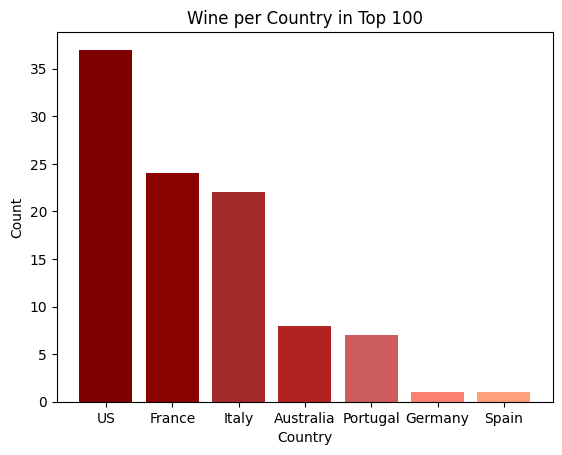

In [25]:
#| output: true
#| echo: true
#| label: fig-1
#| fig-cap: "Wine per Country in top 100"
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Data
countries = ['US', 'France', 'Italy', 'Australia', 'Portugal', 'Germany', 'Spain']
wine_counts = [37, 24, 22, 8, 7, 1, 1]
colors = ['maroon', 'darkred', 'brown', 'firebrick', 'indianred', 'salmon', 'lightsalmon']

## Create a bar plot
fig1, ax1 = plt.subplots()

ax1.bar(countries, wine_counts, color=colors)

## Add labels
plt.title('Wine per Country in Top 100')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Top 100

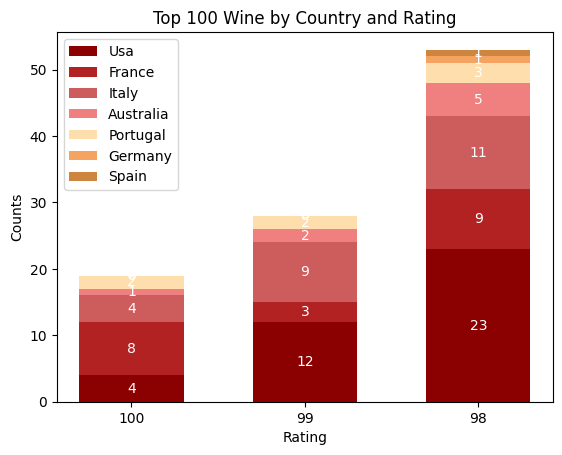

In [26]:
#| output: true
#| echo: true
#| label: fig-2
#| fig-cap: "Composition of wine in top 100"
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Data
scores = ('100', '99', '98')
country_counts = {
          'Usa': np.array([np.sum(us_top_100 == 100), np.sum(us_top_100 == 99), np.sum(us_top_100 == 98)]),
       'France': np.array([np.sum(fr_top_100 == 100), np.sum(fr_top_100 == 99), np.sum(fr_top_100 == 98)]),
        'Italy': np.array([np.sum(it_top_100 == 100), np.sum(it_top_100 == 99), np.sum(it_top_100 == 98)]),
    'Australia': np.array([np.sum(au_top_100 == 100), np.sum(au_top_100 == 99), np.sum(au_top_100 == 98)]),
     'Portugal': np.array([np.sum(po_top_100 == 100), np.sum(po_top_100 == 99), np.sum(po_top_100 == 98)]),
      'Germany': np.array([np.sum(ge_top_100 == 100), np.sum(ge_top_100 == 99), np.sum(ge_top_100 == 98)]),
        'Spain': np.array([np.sum(sp_top_100 == 100), np.sum(sp_top_100 == 99), np.sum(sp_top_100 == 98)]),
}
colors = ['darkred', 'firebrick', 'indianred', 'lightcoral', 'navajowhite','sandybrown','peru']
clr = 0
width = 0.6

## Creating Plot
fig2, ax2 = plt.subplots()
bottom = np.zeros(3)

for country, country_count in country_counts.items():
    color = colors[clr]
    p = ax2.bar(scores, country_count, width, color=color, label=country, bottom=bottom)
    bottom += country_count
    clr += 1
    
    ax2.bar_label(p, label_type='center', color="white")

## Add Labels
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Top 100 Wine by Country and Rating")
plt.legend()

## Display the plot
plt.show()

## Wine Rating Distributions

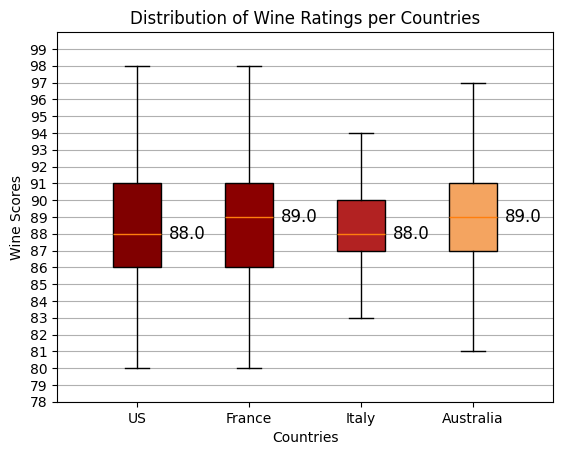

In [27]:
#| output: true
#| echo: true
#| label: fig-3
#| fig-cap: "Distribution of wine ratings by country"
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Data
us = us_best_wine
fr = fr_best_wine
it = it_best_wine
au = au_best_wine
positions = [1, 1.7, 2.4, 3.1]
colors = ['maroon', 'darkred', 'firebrick', 'sandybrown']

## Creating a box plot
fig3, ax3 = plt.subplots()
bplot = ax3.boxplot(
            [us, fr, it, au],
            positions=positions,
            tick_labels=['US', 'France', 'Italy', 'Australia'],
            patch_artist=True,
            widths = .3,
            showfliers=False)

## Setting Options
### Editing Range of Plot
ax3.set_ylim(78, 100)
ax3.set_yticks(range(78, 100, 1))
### fill boxes with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
### Display Median per Country
for median in bplot['medians']:
    x, y = median.get_xdata()[1], median.get_ydata()[1]
    ax3.text(x + 0.05, y, f'{y:.1f}', va='center', fontsize=12)
    
## Adding labels
ax3.yaxis.grid(True)
plt.xlabel('Countries')
plt.ylabel('Wine Scores')
plt.title('Distribution of Wine Ratings per Countries')

# Display the plot
plt.show()

Using a simple bar chart @fig-1 we can see the countries that produced wines that were rated highest in the world for the year 2019. Only 7 of the 42 countries present in the dataset got perfect to near perfect scores. The US had the most wines in the top 100 list with a total of 37 rated at 98 and higher, followed by France and Italy. Breaking down the composition of each nation's wine by their scores @fig-2 we noticed that France had double the amount of perfect scoring wines then that of the US and Italy. Looking further into the distrubtions of ratings per the 4 most prevelant countries @fig-3 the US and France share a common distribution, only differing in french made wines median being marginally higher. Median's explain where a set's true middle ground is in regard to askew datasets. This only slightly promotes the idea that origin plays a factor on the quality of wine. This is further evident when we take into consideration that this dataset contains a vast majority of american wines compared to other countries: 

In [28]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
#white_wine['Country'].value_counts()

|Country      |Count  |
|-------------|-------|
|US           |  50222|
|France       |  16237|
|Italy        |  15490|
|Spain        |   6032|
|Portugal     |   4501|
|Argentina    |   3501|
|Australia    |   2167|
|New Zealand  |   1240|
|South Africa |   1195|
|Greece       |    427|

## The Value of Wine

The next feature we looked into was the price of wine.

In [29]:
#| output: false
#| echo: false
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
# Dividing df by Range of Scores
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
wine_100 = wine_by_score.loc[wine_by_score['Score']==100]
wine_99 = wine_by_score.loc[(wine_by_score['Score']<100) & (wine_by_score['Score']>95)]
wine_95 = wine_by_score.loc[(wine_by_score['Score']<=95) & (wine_by_score['Score']>90)]
wine_90 = wine_by_score.loc[(wine_by_score['Score']<=90) & (wine_by_score['Score']>85)]
wine_85 = wine_by_score.loc[(wine_by_score['Score']<=85) & (wine_by_score['Score']>80)]
wine_80 = wine_by_score.loc[wine_by_score['Score']<=80]

top_half_wine_sorted = wine_by_score.iloc[:52356]
bot_half_wine_sorted = wine_by_score.iloc[52357:]
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Conversions
wine_100_prices = wine_100['Price'].to_numpy()
wine_99_prices  =  wine_99['Price'].to_numpy()
wine_95_prices  =  wine_95['Price'].to_numpy()
wine_90_prices  =  wine_90['Price'].to_numpy()
wine_85_prices  =  wine_85['Price'].to_numpy()
wine_80_prices  =  wine_80['Price'].to_numpy()

wine_100_scores = wine_100['Score'].to_numpy()
wine_99_scores  =  wine_99['Score'].to_numpy()
wine_95_scores  =  wine_95['Score'].to_numpy()
wine_90_scores  =  wine_90['Score'].to_numpy()
wine_85_scores  =  wine_85['Score'].to_numpy()
wine_80_scores  =  wine_80['Score'].to_numpy()
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

score_divisions_price_avgs = {
           "100": np.array([np.mean(wine_100_prices)]),
         "99-96": np.array([np.mean(wine_99_prices)]),
         "95-91": np.array([np.mean(wine_95_prices)]),
         "90-89": np.array([np.mean(wine_90_prices)]),
         "88-85": np.array([np.mean(wine_85_prices)]),
    "84 & Under": np.array([np.mean(wine_80_prices)])
}
score_divisions_price_meds = {
           "100": np.array([np.median(wine_100_prices)]),
         "99-96": np.array([np.median(wine_99_prices)]),
         "95-91": np.array([np.median(wine_95_prices)]),
         "90-89": np.array([np.median(wine_90_prices)]),
         "88-85": np.array([np.median(wine_85_prices)]),
    "84 & Under": np.array([np.median(wine_80_prices)])
}

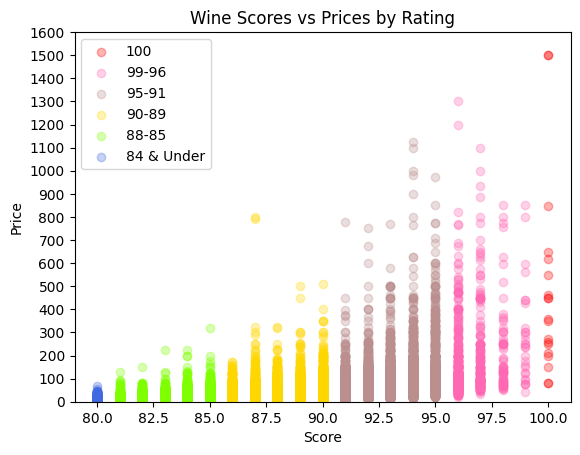

In [36]:
#| output: true
#| echo: true
#| label: fig-4
#| fig-cap: "Scatter plot of wine ratings by price"
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Data
scores = [wine_100_scores, wine_99_scores, wine_95_scores, wine_90_scores, wine_85_scores, wine_80_scores]
values = [wine_100_prices, wine_99_prices, wine_95_prices, wine_90_prices, wine_85_prices, wine_80_prices]
divisions = ["100", "99-96", "95-91", "90-89", "88-85", "84 & Under"]
colors = ['red', 'hotpink', 'rosybrown', 'gold', 'chartreuse', 'royalblue']

## Creating a scatter plot
fig4, ax4 = plt.subplots()

for s, v, c, div in zip(scores, values, colors, divisions):
    plt.scatter(s, v, alpha=0.3, color=c, label=div)

## Setting Options
ax4.set_ylim(78, 102)
ax4.set_yticks(range(0, 1700, 100))

## Adding labels
plt.xlabel("Score")
plt.ylabel("Price")
plt.title("Wine Scores vs Prices by Rating")
plt.legend()

## Display the plot
plt.show()

From the results we can see that while the price of a wine does play an influence in it's rating @fig-4. We noticed that while affordable wine under the 200 price point have been given high ratings even to the 100s it's a scarcity. Along with notion, the higher the rating a wine has the larger the range of prices increases.  

## Simple Linear Regression

Linear regression is a fundamental tool used to predict values based on a data set with 2 variables, one indepent, and the other dependent. The equation for simple linear regression takes on different forms depending on the context. $$y = mx + b $$ In the context of geometry or algebra. $$ \hat{y} = b_0 + b_1 x_1 $$ In the context of statistics and data science.

$\hat{Y}$ represents the predicted value of our dependent variable.

$B_0$ represents the y-intercept. The value of our dependent variable when our independent variable is zero. 

$B_1$ represents the slope. The rate of change in our dependent variable our independent variable.

$x_1$ represents the independent value.

Using this model we aim to find the best fit line to predict the value of a given wine by it's given rating.

### Visualizing Best-Fit-Line

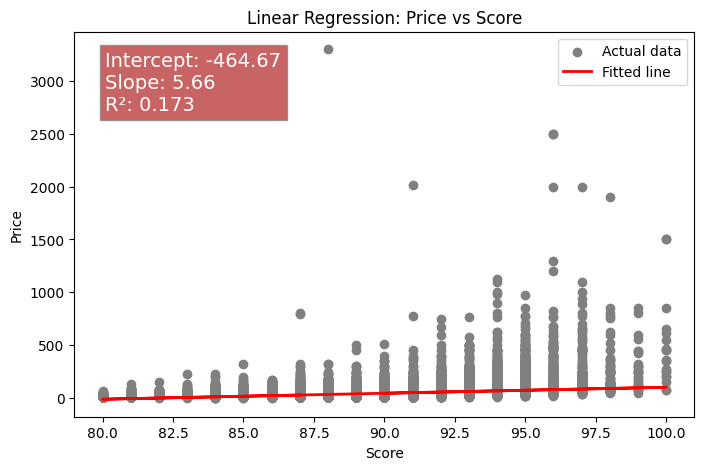

In [89]:
#| output: true
#| echo: true
#| label: fig-5
#| fig-cap: "Best Fit Line on Price vs Score"
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
## Importing Library
from sklearn.linear_model import LinearRegression

## Preparing Dataframe
white_wine.set_index('Score')['Price']

## Defining variables
X = white_wine[['Score']].values  # Independent Variable
y = white_wine['Price'].values    # Dependent Variable

## Creating Model
lr = LinearRegression()
lr.fit(X,y)
### Predicts the price of wine based on it's score using model
pred = lr.predict(X)  

## Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', label='Actual data')
plt.plot(X, pred, color='red', linewidth=2, label='Fitted line')

## Setting Options
### Display regression info on the plot
slope = lr.coef_[0]
r2 = lr.score(X, y)
###
res = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nR²: {r2:.3f}'

## Adding Labels
plt.title('Linear Regression: Price vs Score')
plt.xlabel('Score')
plt.ylabel('Price')
plt.legend()
### plt.(X-coord, Y-coord, Text, Interpret coords relative to axis, Fontsize, Color, Position, Add Border box around text)
plt.text(
    0.05, 0.95, textstr, transform=plt.gca().transAxes,
    fontsize=14, color='white', verticalalignment='top',
    bbox=dict(facecolor='firebrick', alpha=0.7, edgecolor='gray')
)

## Display the plot
plt.show()

The results of this model showed us a few things. The slope tells us there is a positive trend. For every point in score we can expect an increase in price. However, our best fitting line @fig-5 for our dataset resulted in a low $R^2$. This explains that our model is only accurate with up to 17.3% of our data. Simply put our model is too inaccurate to predict the price of a given wine based on it's score. Other factors played a deeper role in this set. 

## Conclusion

Through our analysis we found that there is a slight positive trend correlating the price to higher wine ratings. However, due to huge variations of low priced wine getting high ratings meant more factors were at play such as the country of origin. European countries that have held long foundation of wine making such as France and Italy produce consistently high rated wines, compared to the US which had a larger variance of ratings. Thus, when shopping around for your next bottle of wine save yourself some money from buying an expensive french made wine in favor of some of the cheaper options as their quality could be comparable.

---

### References  

---

<p style="text-indent:-40px; margin-left:40px;">
R4DS Online Learning Community. (2018–present). <i>TidyTuesday: A weekly data project</i>. 
GitHub repository. Retrieved from 
<a href="https://github.com/rfordatascience/tidytuesday">https://github.com/rfordatascience/tidytuesday</a>
</p>

<p style="text-indent:-40px; margin-left:40px;">
Waples, J. (2024, September 28). Simple linear regression: everything you need to know.
    <a href="https://www.datacamp.com/tutorial/simple-linear-regression">https://www.datacamp.com/tutorial/simple-linear-regression</a>
</p>